# Assignment 6
ES 114: Probability, Statistics and Data Visualisation

Authors: Group **J028**
1. Kowel P Laloo - 24110168
2. Pranav Ram R - 24110270
3. Pranjal Goyal - 24110274

In [1]:
import torch
import  matplotlib.pyplot as plt
from scipy.signal import fftconvolve

# **1. Joint PDF, PMF and CDF**

### **Question 1: Joint PMF of Two Dice**

Write a Python function that computes the joint probability mass function (PMF) of the sum of two fair six-sided dice. The function should:

Generate all possible outcomes of rolling two six-sided dice.

Compute and return the joint PMF as a dictionary, where keys are tuples
(𝑋,𝑌) representing the outcomes of the two dice, and values are the corresponding probabilities.

In [ ]:
def joint_pmf(*args):
    pmf = {}
    X = torch.arange(1, 7)
    Y = torch.arange(1, 7)
    outcomes = torch.cartesian_prod(X, Y)

    for x, y in outcomes:
        pmf[(x.item(), y.item())] = 1 / 36

    if not args:
        print("All possible outcomes:\n", outcomes)
        return pmf
    elif len(args) == 2:
            x,y = args[0], args[1]
            return pmf.get((x, y), 0)
    else:
         print("Invalid number of arguments.")
         return

print(joint_pmf())

All possible outcomes:
 tensor([[1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [2, 1],
        [2, 2],
        [2, 3],
        [2, 4],
        [2, 5],
        [2, 6],
        [3, 1],
        [3, 2],
        [3, 3],
        [3, 4],
        [3, 5],
        [3, 6],
        [4, 1],
        [4, 2],
        [4, 3],
        [4, 4],
        [4, 5],
        [4, 6],
        [5, 1],
        [5, 2],
        [5, 3],
        [5, 4],
        [5, 5],
        [5, 6],
        [6, 1],
        [6, 2],
        [6, 3],
        [6, 4],
        [6, 5],
        [6, 6]])
{(1, 1): 0.027777777777777776, (1, 2): 0.027777777777777776, (1, 3): 0.027777777777777776, (1, 4): 0.027777777777777776, (1, 5): 0.027777777777777776, (1, 6): 0.027777777777777776, (2, 1): 0.027777777777777776, (2, 2): 0.027777777777777776, (2, 3): 0.027777777777777776, (2, 4): 0.027777777777777776, (2, 5): 0.027777777777777776, (2, 6): 0.027777777777777776, (3, 1): 0.027777777777777776, (3, 2): 

In [20]:
x = 1
y = 5
print(f"p_X,Y({x},{y}) = P[X={x},Y={y}] = {joint_pmf(1, 2):.5f}")

p_X,Y(1,5) = P[X=1,Y=5] = 0.02778


### **Question 2: Joint CDF of Two Dice**

Write a Python function that calculates the joint cumulative distribution function (CDF) for rolling two six-sided dice. The function should:

Accept two integers a and b, representing dice outcomes up to which the CDF is computed.

Compute 𝑃(𝑋≤𝑎,𝑌≤𝑏) which is the probability that the first die is at most a and the second die is at most b.

In [23]:
def joint_cdf(a,b):
    X = torch.arange(1, 7)
    Y = torch.arange(1, 7)
    outcomes = torch.cartesian_prod(X, Y)
    cdf = {}

    for x, y in outcomes:
        for i in range(1, x+1):
            for j in range(1, y+1):
                cdf[(i,j)] = cdf.get((i, j), 0) + 1 / 36

    return cdf.get((a, b), 0)

x = 3
y = 2

print(f"p_X,Y({x},{y}) = P[X<={x},Y<={y}] = {joint_cdf(x, y):.5f}")

p_X,Y(3,2) = P[X<=3,Y<=2] = 0.55556


# **2. Joint Expectation**

### **Question 1: Monte Carlo Estimation of Joint Expectation**

**Objective:** Implement a Monte Carlo simulation to estimate the expected value of a function of two jointly distributed random variables.

**Problem Statement:**  
Let $X$ and $Y$ be two continuous random variables with joint probability density function (PDF):
$$
f_{X,Y}(x, y) = \begin{cases}
6(1 - y), & 0 \leq x \leq 1, 0 \leq y \leq 1 \\
0, & \text{otherwise}
\end{cases}
$$

Define the function $ g(X, Y) = X^2 + Y $.  
Using Monte Carlo simulation:
1. Generate $ N = 10,000 $ samples of $(X, Y)$ from the given joint distribution.
2. Estimate $ E[g(X, Y)] = E[X^2 + Y] $.
3. Compare your empirical estimate with the analytical solution.

**Instructions:**  
- Plot the sampled distribution of $(X, Y)$.
- Compute and report the relative error between the estimated and analytical expectation.

### Solution

**Error in question:**  
The PDF $f_{X,Y}(x, y)$ is NOT valid. The total integral of the PDF should equal 1, but here it equals 3.

$$
\int_0^1 \int_0^1 6(1-y) \, dx \, dy = \int_0^1 \left[ \int_0^1 6(1-y) \, dx \right] dy = \int_0^1 \left[ 6(1-y) \cdot 1 \right] dy = \int_0^1 6(1-y) \, dy
$$
$$
= 6 \left[ y - \frac{y^2}{2} \right]_0^1 = 6 \left( 1 - \frac{1}{2} \right) = 3
$$

So, we shall normalise it to:
$$
f_{X,Y}(x, y) = \begin{cases}
2(1 - y), & 0 \leq x \leq 1, 0 \leq y \leq 1 \\
0, & \text{otherwise}
\end{cases}
$$

In [ ]:
def joint_pdf(x,y):
    return torch.where((x >= 0) & (x <= 1) & (y >= 0) & (y <= 1),2(1-y), torch.zeros_like(0))

### **Question 2: Linearity of Expectation in Joint Distributions**

**Objective:** Verify the linearity property of expectation using joint distributions.

**Problem Statement:**  
For any two random variables $ X $ and $ Y $, the expectation satisfies:

$$
E[aX + bY] = aE[X] + bE[Y]
$$

for constants $ a, b $. Using the joint PDF from Question 1:

**Tasks:**
1. Choose arbitrary values for $ a $ and $ b $.
2. Compute $ E[aX + bY] $ analytically and using Monte Carlo simulation.
3. Compute $ aE[X] + bE[Y] $ analytically and using Monte Carlo simulation.
4. Compare both results and compute the relative error.
5. Discuss why the linearity of expectation holds regardless of dependence between $ X $ and $ Y $.


# **3. Correlation and covariance**

### **Question 1: Correlation Matrix and Identifying Highly Correlated Features**  
Given a batch of N samples with d features, implement a PyTorch function that computes the correlation matrix (from scratch without using torch.corrcoef) for the dataset. And then Identify Highly Correlated Features which are above a given threshold (e.g., 0.8). Return a list of feature pairs along with their correlation values.

#### **Example:**  
```python
import torch

def correlation_matrix(X):

def highly_correlated_features(X, threshold=0.8):

X = torch.randn(100, 5)
print(correlation_matrix(X))
print(highly_correlated_features(X, 0.1))


```

In [ ]:
def correlation_matrix(X):


def highly_correlated_features(X, threshold=0.8):


X = torch.randn(100, 5)
print(correlation_matrix(X))
print(highly_correlated_features(X, 0.1))

### **Question 2: Weighted Covariance**  
Compute a weighted covariance between two 1D PyTorch tensors `x` and `y`, where each sample pair `(x[i], y[i])` is assigned a weight `w[i]` from a weights tensor `weights`.

In the **weighted** version, each sample pair `(x[i], y[i])` is multiplied by a weight `w[i]`, and the means and covariance are adjusted accordingly. The weighted covariance formula becomes:

$$ \text{Cov}_w(X, Y) = \frac{1}{\sum w_i - 1} \sum_{i=1}^{n} w_i (x_i - \bar{x}_w)(y_i - \bar{y}_w) $$

where:

$$ \bar{x}_w = \frac{\sum w_i x_i}{\sum w_i} $$
$$ \bar{y}_w = \frac{\sum w_i y_i}{\sum w_i} $$



# **4. Conditional Distributions**

### **Question 1:**

Let $X$ and $Y$ be continuous random variables with the joint PDF:

$
f_{X,Y}(x,y) = 2 e^{-x} e^{-y}, \quad {0} \leq {y} \leq {x} < \infty
$

Write a Python program that:

1. Computes the **marginal PDF** $(f_Y(y))$ for $y=1$:

   $
   f_Y(y) = \int_{y}^{\infty} f_{X,Y}(x,y) \, dx
   $

2. Computes the **conditional PDF** $( f_{X|Y}(x | y))$ for $x=2$ and $y=1$:

   $
   f_{X|Y}(x | y) = \frac{f_{X,Y}(x,y)}{f_Y(y)}
   $


### **Question 2:**

A binary signal \( X \) is transmitted over a noisy channel:

$
X =
\begin{cases}
+1, & \text{with probability } \frac{1}{2} \\
-1, & \text{with probability } \frac{1}{2}
\end{cases}
$

The received signal is modeled as:

$
Y = X + N, \quad N \sim \mathcal{N}(0,1)
$

where $( N $) is Gaussian noise with mean 0 and variance 1.

**To do:**

1. Compute and plot the likelihood function $( P(Y | X) )$.
2. Use **Bayes' theorem** to compute and plot the posterior probability:

   $
   P(X = +1 | Y > 0)
   $

3. Create a **3D surface plot** to visualize $P(X | Y)$ as a function of both $( X )$ and $( Y )$.


# **5. Conditional expectation**

### **Question 1:**
You roll two fair 6-sided dice. Let S be the sum of the two dice, and let M be the maximum of the two dice.

- Theoretical Computation:

  Compute the unconditional expectation E[M], the expected maximum of two dice rolls.

  Compute the conditional expectation E[M∣S is even], the expected maximum given that the sum is even.

- Write a Python function simulate_dice_rolls(n) that:

  Simulates rolling two dice n times.

  Estimates both E[M] and E[M∣S is even].

  Compares the estimated values with the theoretical results.

  Run the function for 10,000 simulations and interpret the results.



# **6. Sum of two random variables**

### **Question 1:**
Write a Python program to simulate the sum of two independent discrete uniform random variables \( X \) and \( Y \), where both are uniformly distributed over \{0, 1, 2, 3\}.

- Generate **100,000** random samples of \( X \) and \( Y \).
- Compute \( Z = X + Y \) for each sample.
- Plot the empirical probability mass function (PMF) of \( Z \) using Matplotlib.
- Compare the simulated PMF with the theoretical PMF.


# **7. Examples of sum of two random variables**

### **Question 1: Numerical Convolution of Exponential PDFs**

Let \(X\) and \(Y\) be independent random variables with PDFs:

\
f_X(x) =
\begin{cases}
x e^{-x}, & x \geq 0 \\
0, & \text{otherwise}
\end{cases}

f_Y(y) =
\begin{cases}
y e^{-y}, & y \geq 0 \\
0, & \text{otherwise}
\end{cases}


**Task**:  
1. Numerically compute the PDF of \(Z = X + Y\)
2. Compare your numerical result with the analytical solution:
   \[
   f_Z(z) =
   \begin{cases}
   \dfrac{z^3}{6} e^{-z}, & z \geq 0 \\
   0, & \text{otherwise}
   \end{cases}
   


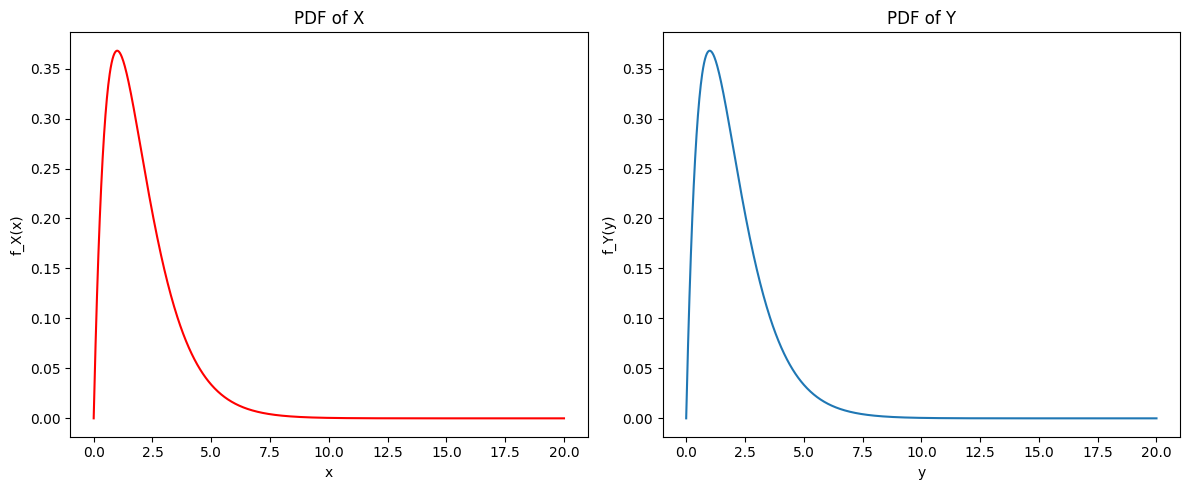

In [ ]:
def f_X(x):
    return torch.where(x >= 0, x*torch.exp(-x), torch.zeros_like(x))

def f_Y(y):
    return torch.where(y >= 0, y*torch.exp(-y), torch.zeros_like(y))

x_vals = torch.linspace(0, 20, 1000)

y_vals = torch.linspace(0, 20, 1000)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_vals.numpy(), f_X(x_vals).numpy(), color='red')
plt.title("PDF of X")
plt.xlabel("x")
plt.ylabel("f_X(x)")

plt.subplot(1, 2, 2)
plt.plot(y_vals.numpy(), f_Y(y_vals).numpy())
plt.title("PDF of Y")
plt.xlabel("y")
plt.ylabel("f_Y(y)")

plt.tight_layout()
plt.show()

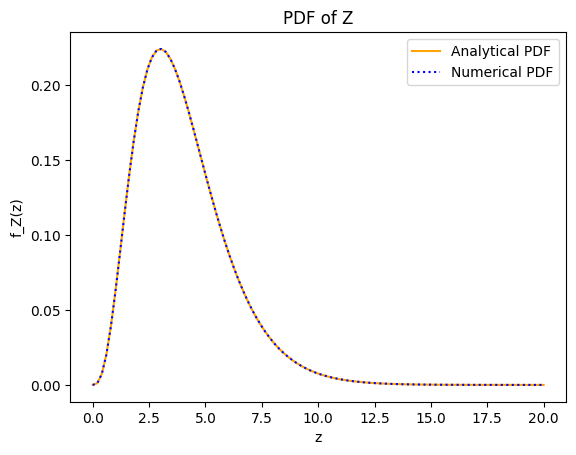

In [32]:
# Numerical convolution

def f_Z(z):
    return torch.where(z >= 0, z**3 / 6 * torch.exp(-z), torch.zeros_like(z))

dy = y_vals[1] - y_vals[0]

z_vals = torch.linspace(0, 20, 100)

f_Z_numerical = []

for z in z_vals:
    integrand = f_X(z - y_vals) * f_Y(y_vals)
    integral = torch.sum(integrand) * dy
    f_Z_numerical.append(integral)

plt.plot(z_vals.numpy(), f_Z(z_vals).numpy(), label='Analytical PDF', color='orange')
plt.plot(z_vals.numpy(), f_Z_numerical, label='Numerical PDF', color='blue', linestyle=':')
plt.title("PDF of Z")
plt.xlabel("z")
plt.ylabel("f_Z(z)")
plt.legend()
plt.show()

### **Question 2: Simulate the sum of two Gaussian variables**
X
∼
N
(
1
,
2
)
 and
Y
∼
N
(
3
,
4
)
 and verify that
X
+
Y
∼
N
(
4
,
6
)


**NOTE:** Here, we shall solve the question assuming the notation as N(μ, σ²), not N(μ, σ)

TypeError: sqrt(): argument 'input' (position 1) must be Tensor, not float

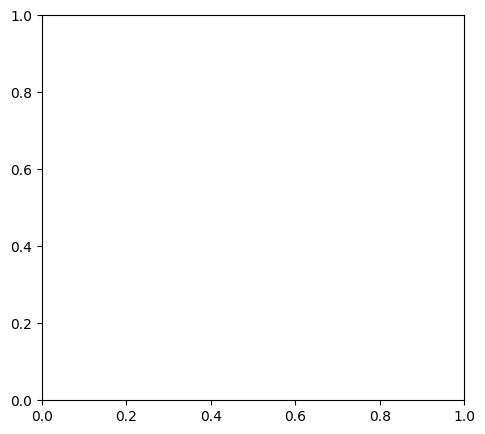

In [ ]:
def normal_pdf(mu, sigma, x_vals):
    return torch.exp(-0.5 * ((x_vals - mu) / sigma)**2) / (sigma * torch.sqrt(2 * torch.pi))

def f_X(x):
    return normal_pdf(1,2,x)

def f_Y(y):
    return normal_pdf(3,4,y)

x_vals = torch.linspace(0, 20, 1000)

y_vals = torch.linspace(0, 20, 1000)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_vals.numpy(), f_X(x_vals).numpy(), color='red')
plt.title("PDF of X")
plt.xlabel("x")
plt.ylabel("f_X(x)")

plt.subplot(1, 2, 2)
plt.plot(y_vals.numpy(), f_Y(y_vals).numpy())
plt.title("PDF of Y")
plt.xlabel("y")
plt.ylabel("f_Y(y)")

plt.tight_layout()
plt.show()

# **8. Jensen's Inequality**

### **Question 1:**

Jensen’s inequality states that for a convex function $f(x)$ and a random variable $X$:

$$
f(\mathbb{E}[X]) \leq \mathbb{E}[f(X)]
$$

Task:

- Choose a convex function $f(x)$ (e.g. $f(x) = x^2$ or $f(x) = e^x$)
- Generate random samples of $X$ from a given probability distribution (e.g., Normal, Uniform, or Exponential).
- Compute both sides of Jensen’s inequality using Python.
- Compare the results and check if Jensen’s inequality holds.

What would happen if you now take a concave function? What did you observe?

How does the different between $f(\mathbb{E}[X])$ and $\mathbb{E}[f(X)]$ change for different distributions? Write down all your observations in markdown cell.



# **9. Markov and Chebyshev inequality**

### **Question 1: Markov inequality**
Let $X$ be a non-negative random variable with an expected value $\mathbb{E}[X] = 10$. Markov’s inequality states that for any $a > 0$:

$$
P(X \geq a) \leq \frac{\mathbb{E}[X]}{a}
$$

---

## **Tasks**
1. **Analytical Task:**  
   Use Markov’s inequality to find an upper bound on $P(X \geq 25)$.

2. **Coding Task:**  
   - Simulate 100,000 samples from an **Exponential distribution** with rate $\lambda = \frac{1}{10}$, which has an expected value of $\mathbb{E}[X] = 10$.  
   - Estimate $P(X \geq 25)$ empirically using the generated samples.  

3. **Comparison:**  
   - Compare the empirical probability with the Markov bound.  
   - Discuss whether the bound is tight.

---

## **Hints**
- The exponential distribution with rate $\lambda$ has mean $\frac{1}{\lambda}$.


### **Question 2: Chebyshev’s Inequality**

For a set of i.i.d. random variables $X_1, X_2, \dots, X_N$ with mean $\mu = 5$ and variance $\sigma^2 = 4$, the sample mean is:

$$
\bar{X} = \frac{1}{N} \sum_{i=1}^{N} X_i
$$

Chebyshev’s inequality states:

$$
P(|\bar{X} - \mu| \geq k) \leq \frac{\sigma^2}{N k^2}
$$

### **Tasks**

1. **Analytical Task:**
   - Use Chebyshev’s inequality to find an upper bound for $P(|\bar{X} - 5| \geq 1)$ for $N = 10$ and $N = 100$.

2. **Coding Task:**
   - Simulate 100,000 trials where you compute sample means for $N = 10$ and $N = 100$, assuming each $X_i \sim U[3, 7]$ (uniform distribution on the interval [3, 7]).
   - Estimate $P(|\bar{X} - 5| \geq 1)$ empirically from the simulations.

3. **Comparison and Discussion:**
    - Compare the simulated probabilities with the theoretical bounds. Discuss how the probability behaves as $ N \to \infty $, linking this to the **Weak Law of Large Numbers**.